<a href="https://colab.research.google.com/github/anthoak13/HNR-1303-F24/blob/F24/unit-02/02-04-gamblers-ruin/02-04-LLN-reading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Reporting on Monte-Carlo Models

The goal of this notebook (or "textbook chapter") is to discuss some of the subtleties of reporting the results of Monte-Carlo models. Namely, how do we know if we have run enough trials that are reported answer is "close enough" to the true answer?

We left the end of first Monte Carlo notebook with two big questions:
- How do we know we are right? We get a different answer every time!
- How certain are we that the answer we get is close to the right answer?

We're now ready to answer those questions.

**Before continuing, go to the menu and seleect `Runtime->Run all`**

## Mean and Standard Deviation

When we describe a number acquired through some experimental process, there are always two pieces of information we need to report: the value itself and the  uncertainty associated with that value. The value represents our best estimate based on the measurement, while the uncertainty reflects the range within which the true value is likely to lie, given the limitations of our measurement process.

For example, suppose we are measuring the length of a table. With our meter stick, we record the length as 0.750 meters. The divisions on the meter stick mark each 0.001 meter, and it's hard to tell exactly which mark lines up with *exactly* the end of the table. Because of the difficulty aligning, we estimate that we are definitely within two divisions, or 0.002 meters. We can report the length of the table to be $0.750 \pm 0.002$ meters. In other words, the length of the table is somewhere between 0.748 and 0.752 meters, but our measurement is not precise enough to specify exactly where within this range it falls.

Just guessing how well we can make a measurement is unsatisfying. How can you know if you are estimating the uncertainty in your measurement properly? The answer is, you often cannot.

### Mean

Luckily, we can use some statistics to estimate the uncertainty in our measurement by repeating the measurement multiple times. Repeating the measurement multiple times allows us to take an average or **mean** of our measurements. Assuming our measurements are independent (that is, the past measurements do not impact future measurements) then the mean should be a better estimate of the true value than any single one of our measurements.

The **mean**, $\mu$, is defined as the sum of all the measurements divided by the total number of measurements. If we say we have $N$ measurement, $x_1, x_2, ..., x_N$, then the mean $\mu$ is defined as:

$$ \mu = \frac{1}{N}\sum_{i=1}^N x_i$$

The symbol $\Sigma$ just means "sum" or "add". So another way to write that equation (for three measurement, $N=3$) is
$$
\mu = \frac{1}{3}(x_1 + x_2 + x_3)
$$

We can also represent this operation in code with a `for` loop:


In [2]:
measurements = [2,4,3,4,5]
N = len(measurements) # len is a function that gets the number of elements in a list
print(f"Our {N} measurement are: {measurements}")
sum = 0

for m in measurements:
  sum = sum + m

avg = sum/N
print(f"The average is {avg:.3f}")

Our 5 measurement are: [2, 4, 3, 4, 5]
The average is 3.600




You have seen this idea in the Monte Carlo models we have developed up to this point. Running a single trial of a Monte Carlo tells you very little, but taking the average of many trials allows you to start to converge on an answer close to the true answer. Think back to the example of flipping a coin on the first day of this unit. Calculating the probability of getting heads by flipping a coin ten times can give you a wide range of answers. Calculating the probability of getting heads flipping a coin a million times gives you an answer much closer to the true value of 0.5.

### Standard Deviation

Repeating the measurement multiple times allows us to ask another question: How close are each of our measurements to the mean? If all our measurements are close to the mean, then we can have confidence that the true value is close to the mean. If our measurements have a wide spread, than we might have little confidence that the true value is close to the mean.

We can quantify this using the **standard deviation**, denoted by the symbol $\sigma$. *The standard deviation is like the average difference (or deviation) between each measurement and the mean.* Importantly, we only care about how far away the measurement is, not if the measurement is higher or lower. Rather than take the average of the difference, we instead take the average of *the square* of the difference since that is always a positive number. To make the standard deviation more interpretable, we then take the square root. In equation form the standard deviation is given by:
$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=0}^N(x_i - \mu)^2}
$$

If we were to write out the sum explicitly for the case of three measurements ($N=3$) again we would get:
$$
\sigma = \sqrt{\frac{1}{3} \left[(x_1 - \mu)^2 + (x_2 - \mu)^2 + (x_3 - \mu)^2 \right]}
$$

Similarly, we can define the standard deviation as a `for` loop:

In [3]:
measurements = [2,4,3,4,5] # Our list of measurement values
N = len(measurements) # len is a function that gets the number of elements in a list

# print out our measurements and the number of them
print(f"Our {N} measurement are: {measurements}")

# Using a loop, calculate the sum of all measurements
sum = 0
for m in measurements:
  sum = sum + m

# Calculate the average from the sum
avg = sum/N
print(f"The average is {avg:.3f}")

# Using a loop, calculate the sum of the square of the difference
# between all measurements and the mean
sum = 0
for m in measurements:
  sum = sum + (m - avg)**2

# Calculate the standard deviation
stddev = np.sqrt(sum/N)
print(f"The standard deviation is {stddev:0.3f}.")

# Print out our report
print(f"Our measured value is {avg:.3f} +- {stddev:0.3f}.")


Our 5 measurement are: [2, 4, 3, 4, 5]
The average is 3.600
The standard deviation is 1.020.
Our measured value is 3.600 +- 1.020.


**The standard deviation is a measurement of our uncertainty!** In other words we can be "pretty sure" the true value is within the range given by one standard deviation away from the mean. Often (but not always) these follow gaussian distributions. In that case, we can say there is a 68\% chance the true value is within one standard deviation of the mean, a 95\% chance the true value is within two standard deviations of the mean, and a 99.7\% chance the true value is within three standard deviations of the mean.

### Questions

1. You make 5 measurements of the length of a table. They are $0.754, 0.755, 0.745, 0.750, 0.744$ meters. What is the average and standard deviation of your measurement?

## In the context of Monte Carlo models

Let's look at what all this means in the context of our first example, finding the area under a curve.

Recall the problem from the first reading notebook: Suppose you have a function $f(x)$, plotted below, that is defined from $x=0$ to $x=10$. You want to know how much area exists under the curve described by that function.

We solved this problem by throwing virtual darts at a board and calculating how many of them were under the curve.

The form below makes an estimate of the standard deviation by running 1000 measurements. In this case, each measurement is making an estimation of the area by throwing `number_darts` at the board. It then reports the value from a single measurement along with the estimated standard deviation.

**How does the standard deviation vary as you change the number of darts? How often is the true area within our estimated range?**

FYI: running 1000 darts takes about 5 seconds.

As you increase the number of darts, notice how the standard deviation decreases, indicating that our estimate becomes more precise. This is because more samples reduce the uncertainty in our approximation. You've seen this behavior before.

The difference between our single measurement and the true value tells us how far off our estimate is. Ideally, this difference should be within the range given by our standard deviation, which would indicate that our uncertainty estimate is accurate. Notice that as we increase the number of darts, we are not falling within the range any more frequently. The range is just getting smaller.

Using 1000 measurements we estimate the standard deviation of our measurement to be 4.02.
Our estimate for the area under the curve is 10.00 +- 4.02
The true value for the area under the curve is 14.00
The difference between our single measurement and the true value is -4.00


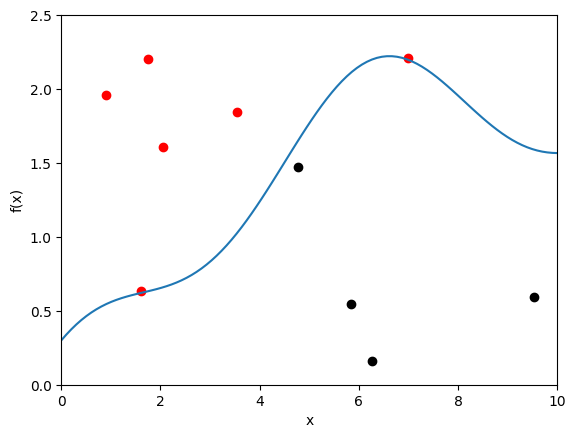

In [91]:
# define the function we are plotting
def f(x):
    return 2*np.sin(.2*x) + .3*np.cos(x)
# Define the integral of that function (to get the true value)
def F(x):
    return -10*np.cos(.2*x) + 0.3*np.sin(x)
# Define code to plot function and points
def plot():
  x = np.linspace(0, 10, 100)

  # Plot the function
  plt.plot(x, f(x))
  plt.scatter(x_under, y_under, color='black')
  plt.scatter(x_over, y_over, color='red')
  plt.ylim(0,2.5)
  plt.xlim(0,10)
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.show()

# Code to run a single trial (or measurement) using number_darts
def trial():
  global under, x_under, y_under, x_over, y_over
  under = 0
  x_under = []
  y_under = []
  x_over = []
  y_over = []

  for i in range(number_darts):
      x = random.uniform(0, 10)
      y = random.uniform(0, 2.5)
      if y < f(x):
          under += 1
          x_under.append(x)
          y_under.append(y)
      else:
          x_over.append(x)
          y_over.append(y)
# calculate and return the average value for all measurements
def avg(measurements):
  sum = 0
  for m in measurements:
    sum += m
  return sum/len(measurements)
# calculate and return the standard deviation for all measurements
def stddev(measurements):
  mean = avg(measurements)
  sum = 0
  for m in measurements:
    sum += (m - mean)**2
  return np.sqrt(sum/len(measurements))

# @title Throwing darts {"run":"auto","vertical-output":true,"display-mode":"form"}
number_darts = 10 # @param {"type":"integer","placeholder":"10"}
number_measurements = 1000

# Estimate the standard deviation for trials with number_darts
areas = []
for i in range(number_measurements):
  trial()
  areas.append(under/number_darts*25)
sigma = stddev(areas)

# run a single trial and get the estimation
trial()
est = under/number_darts*25
true = F(10) - F(0)


print(f"Using {number_measurements} measurements we estimate the standard deviation of our measurement to be {sigma:0.2f}.")
print(f"Our estimate for the area under the curve is {est:.2f} +- {sigma:0.2f}")
print(f"The true value for the area under the curve is {true:.2f}")
print(f"The difference between our single measurement and the true value is {est-true:.2f}")


plot()

## Law of large Numbers

Let's return to the law of large numbers and make it more quantitative. Previously, we said "It states that if you perform the same experiment multiple times, the average of the results will approach the expected value. The more experiments performed, the closer the average will be to the expected value." With the introduction of the standard deviation we can now say *exactly* what we mean by that last sentence.

Recall the standard deviation is a measure of how *consistent* are measurements are. That is, if we have a small standard deviation then all of our measurements are close together (and therefore close to the mean).

The Law of Large Numbers tells us **how the standard deviation changes** as we increase the number of measurements:

$$\sigma_{\text{N measurements}} = \frac{\sigma_{\text{1 measurement}}}{\sqrt{N}}$$

Here we have two different standard deviations: $\sigma_{\text{1 measurement}}$ , which is the standard deviation of a single measurement (akin to the variation you'd see in the output from one run of a Monte Carlo simulation), and $\sigma_{\text{N measurement}}$ which is the standard deviation of the average result from $N$ measurements. Essentially, $\sigma_{\text{N measurement}}$ tells us how much the average of $N$ measurements varies, which should be less than the variation of a single measurement. That's a bit confusing, I know. Let's dig into it a little more and see how this works.

Suppose we have a Monte Carlo simulation whose output has an uncertainty of $\sigma_0 = 1$. If we were to run that Monte Carlo 10 times, and take the average of those 10 measurements, then standard deviation of those 10 measurements would be $\sigma = \sigma_{0}/\sqrt{10}$. This means we can **predict** how many trials we need to run to get a certain accuracy!

Let's look at the example above to understand this. Let's use for our "single Monte Carlo" a simulation where we throw 10 darts at the board. When we run the simulation for `num_darts=10` it reports the standard deviation is about $\sigma_{10} \approx 3.9$. The subscript in the standard deviation denotes how many darts we throw. Running the 10-dart simulation four times and averaging the results is (near as makes no difference) the same as running a single simulation with 40 darts. We can **predict** what the standard deviation of the 40 dart simulation will be:

$$ \sigma_{40} = \frac{\sigma_{10}}{\sqrt{4}} = \frac{3.9}{2} = 1.95$$

Here the $4$ under the square root indicates that 40 is four times larger than 10 (because run with 40 darts is the same at 4 runs with 10 darts). Run the model above with 40 darts, what do you get for the standard deviation now? When I ran it I got $\sigma_{40}=1.93$. That's pretty close!

This is critical in developing models. Thanks to the Law of Large Numbers, we can predict the standard deviation for *any* number of trials. We were able to succesfully predict the standard deviation of a 40 dart measurement using our previous calculation for 10 darts. By running a model with low $N$ many times, we can estimate the standard deviation of the model. We can then use the Law of Large Numbers to scale our expected variance to any $N$!


### Questions

1. Take the model above where $\sigma_{10} = 3.9$. If you throw 1000 darts instead of 10 darts, what is you standard deviation on the run with 1000 darts? Use the Law of Large Numbers to make a **prediction**, then run the model with 1000 darts. How do they compare?
